<h2 style='text-align: Center'> Fake News Detection Prototype</h2>
<p style='text-align: Center'>CM3070 Final Year </p>

<h2>Introduction </h2>

<h2>Model 1 : Passive Aggressive Classifier (Baseline Model) </h2>

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#load the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop = True)

In [3]:
# Counting number of rows and columns in the data
print('Shape of Training Data: ', train.shape)

# Gettiing a hang of the data in each column and their names
print('\n \n TRAIN \n', train.head())
print('\n \n TEST \n', test.head())

# Looking for any places where training data has NaN values
print('\n \nNumber of Null values in Train Set: ', train['text'].isna().sum())
print('Number of Null values in Test Set: ', test['text'].isna().sum())

# Dropping all rows where text column is NaN
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

Shape of Training Data:  (20800, 5)

 
 TRAIN 
    id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  

 
 TEST 
                                                    title  \
id                          

In [4]:
# Checking length of each article
length = []
[length.append(len(str(text))) for text in train['text']]
train['length'] = length
print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  1 
Maximum Length:  142961 
Average Length:  4553


In [5]:
# Spot outliers and remove them.
print('Number of articles with less than 50 words: ', len(train[train['length'] < 50]))
# Skimming through such short texts just to be sure
print(train['text'][train['length'] < 50])

Number of articles with less than 50 words:  207
82                                                   
169                                                  
173                                   Guest   Guest  
196            They got the heater turned up on high.
295                                                  
                             ...                     
20350                         I hope nobody got hurt!
20418                                 Guest   Guest  
20431    \nOctober 28, 2016 The Mothers by stclair by
20513                                                
20636                              Trump all the way!
Name: text, Length: 207, dtype: object


In [6]:
# Removing outliers, it will reduce overfitting
train = train.drop(train['text'][train['length'] < 50].index, axis = 0)
print('Minimum Length: ', min(train['length']), '\nMaximum Length: ', max(train['length']), '\nAverage Length: ', round(sum(train['length'])/len(train['length'])))

Minimum Length:  50 
Maximum Length:  142961 
Average Length:  4598


In [7]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [8]:
# Set up Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fit and transform training set 
tfidf_train = tfidf.fit_transform(x_train)
# Transform test set
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])

In [9]:
# Set up Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter = 50)

# Fit on the training set
pac.fit(tfidf_train, y_train)

# Predict the test set
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f' Baseline Accuracy: {round(score * 100, 2)}%')

 Baseline Accuracy: 96.89%


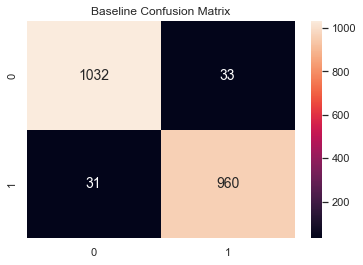

In [10]:
# Creating confusion matrix with columns as True Positive, False Negative, False Positive and True Negative 
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size':14}, fmt='d').set_title('Baseline Confusion Matrix')
plt.show()

In [11]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Predicted Fake News', "Predicted Real News"], index=['Actual Fake News', 'Actual Real News']))

                  Predicted Fake News  Predicted Real News
Actual Fake News                 1032                   33
Actual Real News                   31                  960


In [12]:
# Creating classification report
print('Baseline Classification Report:\n')
print(classification_report(y_test, (y_pred > 0.5)))

Baseline Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1065
           1       0.97      0.97      0.97       991

    accuracy                           0.97      2056
   macro avg       0.97      0.97      0.97      2056
weighted avg       0.97      0.97      0.97      2056



<h2>Model 2: Support Vector Machine Model</h2>

In [20]:
# Import necessary libraries
# import numpy as np
# import pandas as pd
# import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [21]:
# Load the files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop=True)

In [22]:
# Dropping rows with NaN values in the "text" column
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

In [23]:
# Removing outliers
train = train[train['text'].str.len() > 50]


In [24]:
# Secluding labels in a new pandas dataframe for supervised learning
train_labels = train['label']

# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [25]:
# Setting up Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform training set
tfidf_train = tfidf.fit_transform(x_train)
# Transform test set
tfidf_test = tfidf.transform(x_test)
tfidf_test_final = tfidf.transform(test['text'])


In [26]:
from sklearn.svm import SVC

In [27]:
# Set up Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM classifier on the training set
svm_classifier.fit(tfidf_train, y_train)

# Predict the test set
y_pred_svm = svm_classifier.predict(tfidf_test)

In [28]:
from sklearn.metrics import accuracy_score

# Calculating accuracy
score_svm = accuracy_score(y_test, y_pred_svm)
print(f'Model 2 Accuracy: {round(score_svm * 100, 2)}%')

Model 2 Accuracy: 96.94%


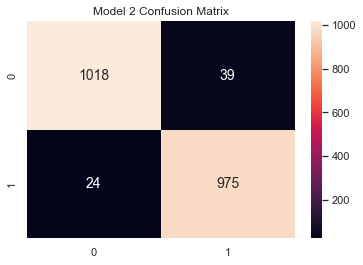

In [29]:
from sklearn.metrics import confusion_matrix

# Creating confusion matrix with columns as True Positive, False Negative, False Positive, and True Negative
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1])
df_cm_svm = pd.DataFrame(cm_svm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm_svm, annot=True, annot_kws={'size': 14}, fmt='d').set_title('Model 2 Confusion Matrix')
plt.show()

In [30]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Predicted Fake News', "Predicted Real News"], index=['Actual Fake News', 'Actual Real News']))

                  Predicted Fake News  Predicted Real News
Actual Fake News                  612                  445
Actual Real News                  451                  548


In [31]:
from sklearn.metrics import classification_report

# Creating classification report
print('Model 2 Classification Report:\n')
print(classification_report(y_test, y_pred_svm))


Model 2 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1057
           1       0.96      0.98      0.97       999

    accuracy                           0.97      2056
   macro avg       0.97      0.97      0.97      2056
weighted avg       0.97      0.97      0.97      2056



<h2>Model 3 : Multinomial Naive Bayes Model </h2>

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [33]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop=True)

In [34]:
# Drop rows with NaN values in the "text" column 
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

In [35]:
# Remove outliers 
train = train[train['text'].str.len() > 50]

In [36]:
# Seclude labels in a new pandas dataframe for supervised learning
train_labels = train['label']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [37]:
# Set up a Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training set 
tfidf_train = tfidf.fit_transform(x_train)

# Transform the test set
tfidf_test = tfidf.transform(x_test)

In [38]:
from sklearn.naive_bayes import MultinomialNB

# Set up a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Fit the Multinomial Naive Bayes classifier
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [39]:
# Predicting on the test set
y_pred_nb = nb_classifier.predict(tfidf_test)


In [40]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f' Model 3 Accuracy: {round(accuracy_nb * 100, 2)}%')

 Model 3 Accuracy: 86.82%


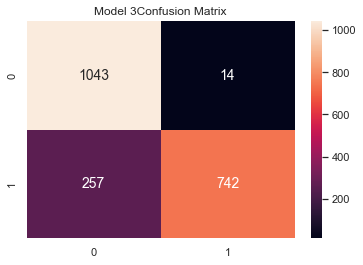

In [41]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=[0, 1])
df_cm_nb = pd.DataFrame(cm_nb, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm_nb, annot=True, annot_kws={'size': 14}, fmt='d').set_title('Model 3Confusion Matrix')
plt.show()


In [42]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=['Predicted Fake News', "Predicted Real News"], index=['Actual Fake News', 'Actual Real News']))

                  Predicted Fake News  Predicted Real News
Actual Fake News                  612                  445
Actual Real News                  451                  548


In [43]:
from sklearn.metrics import classification_report

# Generate a classification report
print(' Model 3 Classification Report:\n')
print(classification_report(y_test, y_pred_nb)) 

 Model 3 Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1057
           1       0.98      0.74      0.85       999

    accuracy                           0.87      2056
   macro avg       0.89      0.86      0.87      2056
weighted avg       0.89      0.87      0.87      2056



<h2>Model 4 : TensorFlow Model</h2>

In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [45]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test = test.set_index('id', drop=True)

In [46]:
# Drop rows with NaN values in the "text" column 
train.dropna(axis=0, how="any", thresh=None, subset=['text'], inplace=True)
test = test.fillna(' ')

In [47]:
# Remove outliers 
train = train[train['text'].str.len() > 50]

In [48]:
# Seclude labels in a new pandas dataframe for supervised learning
train_labels = train['label']

In [49]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train['text'], train_labels, test_size=0.1, random_state=0)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Setting up Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training set and transform the test set
tfidf_train = tfidf.fit_transform(x_train)
tfidf_test = tfidf.transform(x_test)

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text data to fit for testing
# Maximum number of words in the vocabulary
max_words = 5000  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad sequences to a fixed length
max_sequence_length = 200  
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define, squence and build the neural network model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Define the functions
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)


In [53]:
# Train the model using the relevant values
model.fit(x_train_padded, y_train, epochs=10, batch_size=64, validation_data=(x_test_padded, y_test), callbacks=[early_stopping])

Epoch 1/10
289/289 [==============================] - 6s 18ms/step - loss: 0.2042 - accuracy: 0.9111 - val_loss: 0.0867 - val_accuracy: 0.9640
Epoch 2/10
289/289 [==============================] - 5s 16ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.1107 - val_accuracy: 0.9572
Epoch 3/10
289/289 [==============================] - 5s 18ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.1070 - val_accuracy: 0.9616
Epoch 4/10
289/289 [==============================] - 5s 19ms/step - loss: 7.6375e-04 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9640


In [54]:
from sklearn.metrics import accuracy_score

# Evaluate the model
y_pred = (model.predict(x_test_padded) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f' Model 4 Accuracy: {accuracy:.2f}')

65/65 [==============================] - 2s 25ms/step
 Model 4 Accuracy: 0.96


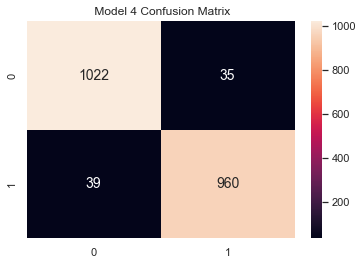

In [55]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={'size': 14}, fmt='d').set_title(' Model 4 Confusion Matrix')
plt.show()


In [56]:
from sklearn.metrics import classification_report

# Generate a classification report
print('Model 4 Classification Report:\n')
print(classification_report(y_test, y_pred))

Model 4 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1057
           1       0.96      0.96      0.96       999

    accuracy                           0.96      2056
   macro avg       0.96      0.96      0.96      2056
weighted avg       0.96      0.96      0.96      2056



<h2>Conclusion</h2>

<p> Based on the results, Model 2, Support Vector Machine is the best model for this Fake News Detection </p>